# SVM Regressor Implementation;

In [1]:
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt 

# creating sythetic dataset 
from sklearn.datasets import make_regression

In [2]:
x,y = make_regression(n_samples=1000, n_features= 2 ,n_targets=1, noise= 3.0)

In [6]:
x       

array([[ 0.16579269,  0.38057091],
       [-0.07679052, -0.06783965],
       [-0.56078188, -0.98536432],
       ...,
       [ 0.01541945,  1.25144847],
       [-1.0941771 , -1.24332625],
       [ 0.9301254 ,  1.14630243]])

In [7]:
y

array([ 2.54656199e+01, -4.84527874e+00, -6.89993675e+01, -3.04521953e+01,
       -7.48715933e+01,  1.23303951e+01, -5.29903133e+01, -1.70918356e+02,
        9.79611130e+01, -8.53905453e+01, -3.12349351e+01,  2.35458245e+01,
        1.44643463e+01, -9.50381259e+00, -4.53902495e+00,  4.63428342e+01,
       -2.98309053e-01,  1.03743437e+02, -3.11722409e+01, -8.67422749e+00,
       -3.87841661e+00,  1.00444752e+01,  6.65794876e+01,  5.84004258e+01,
       -7.91010081e+01, -3.69580065e+01, -7.94219953e+01, -1.73923116e+01,
        2.88233387e+01,  6.14794928e+01, -8.92930759e+01, -7.35630073e+01,
        3.76948913e+01,  7.59496523e+01, -1.15635539e+02, -3.15992141e+01,
        4.08349122e+01, -1.36065142e+01, -3.46584597e+00, -1.49318247e+02,
        3.75742936e+01,  6.76298793e+01,  4.91605467e+01, -9.69915709e+00,
        4.35121919e+01, -9.60432168e+01, -5.91413824e+01, -5.19426114e+01,
       -6.88978601e+01, -4.41451400e+01, -2.21136909e+01, -7.66543019e+01,
       -2.78826516e+01,  

In [8]:
pd.DataFrame(x)[0]

0      0.165793
1     -0.076791
2     -0.560782
3     -0.856124
4     -0.387134
         ...   
995    0.063723
996   -0.553553
997    0.015419
998   -1.094177
999    0.930125
Name: 0, Length: 1000, dtype: float64

<AxesSubplot: xlabel='0', ylabel='1'>

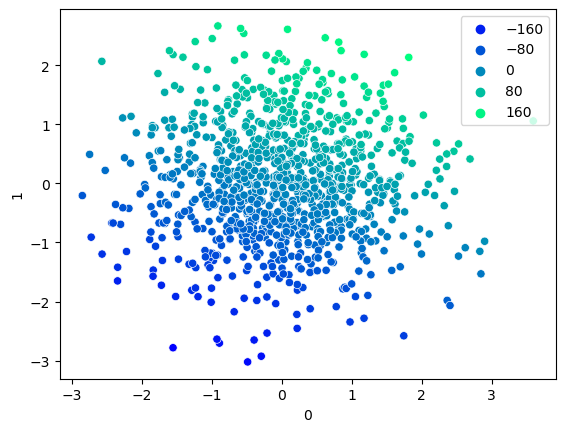

In [12]:
#ploting the dataset with the help of scatterplot 
sns.scatterplot(x = pd.DataFrame(x)[0], y = pd.DataFrame(x)[1], hue= y, palette= 'winter')

In [13]:
# spliting the data with train test split
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size= 0.25, random_state=10 )

In [14]:
# importing the SVR 
from sklearn.svm import SVR
svr = SVR(kernel = 'linear')

In [15]:
svr.fit(x_train, y_train)

SVR(kernel='linear')

In [16]:
svr.coef_

array([[23.27551576, 60.08447241]])

In [19]:
# prediction 
y_pred = svr.predict(x_test)
y_pred

array([   4.8038186 ,   21.49204867,  -73.60220696,  125.43076372,
        -45.51010959,   10.17056727,   -2.95583294,  -19.18917295,
         24.25243383,  -35.43374559,  -56.95896397,  -37.31550049,
         36.93041224,   93.15213691,    4.23316494, -109.7061327 ,
         -0.85044855,    8.51371023,  -47.53042846,   25.27579347,
        -19.13686616,   10.13584127,   21.68315171,  -35.27205135,
        -53.46379037,   -0.47833554,   -7.07576533,   37.58882499,
         37.01655831,  106.35701845,  -50.67572235,  -77.04824808,
         21.21844925,   29.82009611,   50.17795158,   61.96057028,
        -56.38003671,  -46.0885973 ,  -83.07715943,  -57.75660894,
        -70.48771051,  -53.84868492,   53.9650792 ,  -34.39468783,
        -67.94310845,  -27.07083813,  -62.73652034,   43.81862817,
        -37.53736862,  113.32095427,  -13.80224007,   64.3190431 ,
        -62.08100634,  -68.86868537,  -76.69500828,    8.59046599,
         10.85860743,  -15.07603317,   94.82873693,   67.99612

In [25]:
# checking the accurary of the model with r2-score
from sklearn.metrics import r2_score
print('R2-Score = ',r2_score(y_test, y_pred))

R2-Score =  0.9977194262693099


# Hyper tunning with SVR

In [26]:
from sklearn.model_selection import GridSearchCV

param_grid = { 'C': [0.1,1,10,100,1000],
              'gamma': [1,0.1,0.01,0.001,0.0001],
              'kernel': ['linear'],
              'epsilon': [0.1,0.2,0.3]

}

In [28]:
grid = GridSearchCV(SVR(), param_grid = param_grid, refit=True, cv= 5, verbose= 3)
grid

GridSearchCV(cv=5, estimator=SVR(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'epsilon': [0.1, 0.2, 0.3],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['linear']},
             verbose=3)

In [29]:
grid.fit(x_train, y_train)

Fitting 5 folds for each of 75 candidates, totalling 375 fits
[CV 1/5] END C=0.1, epsilon=0.1, gamma=1, kernel=linear;, score=0.895 total time=   0.0s
[CV 2/5] END C=0.1, epsilon=0.1, gamma=1, kernel=linear;, score=0.909 total time=   0.0s
[CV 3/5] END C=0.1, epsilon=0.1, gamma=1, kernel=linear;, score=0.909 total time=   0.0s
[CV 4/5] END C=0.1, epsilon=0.1, gamma=1, kernel=linear;, score=0.896 total time=   0.0s
[CV 5/5] END C=0.1, epsilon=0.1, gamma=1, kernel=linear;, score=0.877 total time=   0.0s
[CV 1/5] END C=0.1, epsilon=0.1, gamma=0.1, kernel=linear;, score=0.895 total time=   0.0s
[CV 2/5] END C=0.1, epsilon=0.1, gamma=0.1, kernel=linear;, score=0.909 total time=   0.0s
[CV 3/5] END C=0.1, epsilon=0.1, gamma=0.1, kernel=linear;, score=0.909 total time=   0.0s
[CV 4/5] END C=0.1, epsilon=0.1, gamma=0.1, kernel=linear;, score=0.896 total time=   0.0s
[CV 5/5] END C=0.1, epsilon=0.1, gamma=0.1, kernel=linear;, score=0.877 total time=   0.0s
[CV 1/5] END C=0.1, epsilon=0.1, gamma

GridSearchCV(cv=5, estimator=SVR(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'epsilon': [0.1, 0.2, 0.3],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['linear']},
             verbose=3)

In [33]:
grid.best_params_

{'C': 100, 'epsilon': 0.3, 'gamma': 1, 'kernel': 'linear'}

In [32]:
grid.best_score_

0.9976435064841788

In [36]:
# Prediction 
y_pred4 = grid.predict(x_test)
print('Final Accuracy is:', r2_score(y_test, y_pred4))

Final Accuracy is: 0.997803005712503
